In [1]:
# Import main packages
import sys, os
sys.path.insert(1, os.path.abspath('..') )
from ECO import diagnostics as eco
from ECO.utils import config_parser, open_datasets, get_namelist
import xarray as xr
import xgcm
import numpy as np

# Import matplotlib for plotting and functions to override default values
import matplotlib.pyplot as plt
#from ECOanalysis import update_plotstyle, cmap_OB
#cmap_OB=cmap_OB(); update_plotstyle()

In [2]:
exp_prefix = ['EXP00','EXP00','EXP00','EXP01','EXP01','EXP01','EXP02','EXP02','EXP02']    # Import all files with this prefix
exp_suffix = ['_1d10','_5d50','_1m500','_1d10','_5d50','_1m500','_1d10','_5d50','_1m500',]
#timestep_slice = {'_6h1440':None, '_12h720':None, '_1d10':(0,360)}
ds = open_datasets(exp_prefix, exp_suffix, components = ['metrics','masks', 'properties'])

In [3]:
# get base configuration of EXP00
kwargs={}
for i in range(len(exp_prefix)): kwargs[exp_prefix[i]+exp_suffix[i]] = config_parser(exp_prefix[i])
#for exp in exp_suffix: kwargs[exp_prefix+exp] = config_parser(exp_prefix)
#if kwargs_sim['get_namelist']: kwargs_sim['namelist'] = get_namelist(path = kwargs_proc['path_nemo'])

# define xgcm configuration based on dataset metrics
_metrics = {('X',): ['e1tm', 'e1um', 'e1vm', 'e1fm'],
     ('Y',): ['e2tm', 'e2um', 'e2vm', 'e2fm'],
     ('Z',): ['e3tm', 'e3um', 'e3vm', 'e3wm']}

grid = {exp: xgcm.Grid(ds[exp], metrics=_metrics, periodic=False) for exp in ds} # define xgcm grid
grid_ops = {exp: eco.Grid_ops(grid[exp], maskargs={'mask':'nan'}) for exp in ds} # define gridoperations.+
grid = {exp: grid_ops[exp]._update({'Z':ds[exp]['e3tm_1d']}) for exp in ds}
        
properties= {exp: eco.Properties(grid_ops[exp], {'X': ds[exp].glamt, 'Y': ds[exp].gphit, 'Z': ds[exp].depth_1d}, eos_properties=kwargs[exp][2]['eos']) for exp in ds}
energetics= {exp: eco.Energetics(grid_ops[exp], properties[exp]) for exp in ds}

Using processing configuration base.yml
Using processing configuration base.yml
Using processing configuration base.yml
Using processing configuration base.yml
Using processing configuration base.yml
Using processing configuration base.yml
Using processing configuration base.yml
Using processing configuration base.yml
Using processing configuration base.yml


In [5]:
ds['EXP00_1m500']

<xarray.Dataset>
Dimensions:       (t: 6000, x_c: 20, y_c: 40, z_c: 36, x_f: 20, y_f: 40, z_f: 36)
Coordinates: (12/17)
  * t             (t) float64 -5.907e+10 -5.906e+10 ... -4.352e+10 -4.352e+10
  * x_c           (x_c) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19
  * y_c           (y_c) int64 0 1 2 3 4 5 6 7 8 9 ... 31 32 33 34 35 36 37 38 39
  * z_c           (z_c) int64 0 1 2 3 4 5 6 7 8 9 ... 27 28 29 30 31 32 33 34 35
  * x_f           (x_f) float64 0.5 1.5 2.5 3.5 4.5 ... 15.5 16.5 17.5 18.5 19.5
  * y_f           (y_f) float64 0.5 1.5 2.5 3.5 4.5 ... 35.5 36.5 37.5 38.5 39.5
    ...            ...
    gphiv         (y_f, x_c) float64 dask.array<chunksize=(40, 20), meta=np.ndarray>
    glamv         (y_f, x_c) float64 dask.array<chunksize=(40, 20), meta=np.ndarray>
    gphif         (y_f, x_f) float64 dask.array<chunksize=(40, 20), meta=np.ndarray>
    glamf         (y_f, x_f) float64 dask.array<chunksize=(40, 20), meta=np.ndarray>
    gdept_0       (z_c, y_c, x_c) float64 dask.array<chunksize=(36, 40, 20), meta=np.ndarray>
    gdepw_0       (z_f, y_c, x_c) float64 dask.array<chunksize=(36, 40, 20), meta=np.ndarray>
Data variables: (12/49)
    e1tm          (t, y_c, x_c) float64 dask.array<chunksize=(600, 40, 20), meta=np.ndarray>
    e1um          (t, y_c, x_f) float64 dask.array<chunksize=(600, 40, 20), meta=np.ndarray>
    e1vm          (t, y_f, x_c) float64 dask.array<chunksize=(600, 40, 20), meta=np.ndarray>
    e1fm          (t, y_f, x_f) float64 dask.array<chunksize=(600, 40, 20), meta=np.ndarray>
    e2tm          (t, y_c, x_c) float64 dask.array<chunksize=(600, 40, 20), meta=np.ndarray>
    e2um          (t, y_c, x_f) float64 dask.array<chunksize=(600, 40, 20), meta=np.ndarray>
    ...            ...
    rho           (t, z_c, y_c, x_c) float32 dask.array<chunksize=(600, 36, 40, 20), meta=np.ndarray>
    rho_gm        (t, z_c) float64 dask.array<chunksize=(600, 36), meta=np.ndarray>
    zg_eta        (t) float64 dask.array<chunksize=(600,), meta=np.ndarray>
    zg_0          (t) float64 dask.array<chunksize=(600,), meta=np.ndarray>
    zgDE          (t) float64 dask.array<chunksize=(600,), meta=np.ndarray>
    zgDE_gm       (t) float64 dask.array<chunksize=(600,), meta=np.ndarray>
Attributes: (12/13)
    name:                    NEMO dataset
    description:             Ocean grid variables, set on the proper positions
    title:                   Ocean grid variables
    Conventions:             CF-1.6
    timeStamp:               2023-Mar-17 10:29:24 GMT
    uuid:                    9734d545-3f8b-40b0-aa57-f8d2fd721c2e
    ...                      ...
    DOMAIN_size_global:      [20 40]
    DOMAIN_halo_size_start:  [0 0]
    DOMAIN_halo_size_end:    [0 0]
    DOMAIN_type:             BOX
    nn_cfg:                  2
    cn_cfg:                  BASIN

In [4]:
P = {}
H = {}
H0 = {}
DH = {}
K = {}

for exp in ds:
    print(exp)
    u_T=grid_ops[exp]._shift_position(ds[exp].uo,'T')
    v_T=grid_ops[exp]._shift_position(ds[exp].vo,'T')
    w_T=grid_ops[exp]._shift_position(ds[exp].wo,'T')

    P[exp] = grid[exp].integrate(ds[exp].rho*9.81*ds[exp].depth, ['X','Y','Z'])
    K[exp] = grid[exp].integrate(0.5*1026*grid_ops[exp].dot([u_T,v_T,w_T],[u_T,v_T,w_T]), ['X','Y','Z']) # rho0 instead of ds[exp].d_seos
    h =energetics[exp].dynamic_enthalpy(ds[exp].to,ds[exp].so,ds[exp].depth,Z_r=ds[exp].zg_0)
    h0=energetics[exp].dynamic_enthalpy(ds[exp].t_gm,ds[exp].s_gm,ds[exp].depth,Z_r=ds[exp].zg_0)
    H[exp] = 1026*grid[exp].integrate(h, ['X','Y','Z'])
    H0[exp] = 1026*grid[exp].integrate(h0, ['X','Y','Z'])
    DH[exp] = 1026*grid[exp].integrate(h-h0, ['X','Y','Z'])

EXP00_1d10
EXP00_5d50
EXP00_1m500
EXP01_1d10
EXP01_5d50
EXP01_1m500
EXP02_1d10
EXP02_5d50
EXP02_1m500


In [5]:
for _suffix in set(exp_suffix):
    print(_suffix)
    print('P    | %.3E  %.3E  %.3E'%tuple([P[exp].mean('t').values for exp in P if _suffix in exp]))
    print('K    | %.3E  %.3E  %.3E'%tuple([K[exp].mean('t').values for exp in K if _suffix in exp]))
    print('H    | %.3E  %.3E  %.3E'%tuple([H[exp].mean('t').values for exp in H if _suffix in exp]))
    print('H0   | %.3E  %.3E  %.3E'%tuple([H0[exp].mean('t').values for exp in H0 if _suffix in exp]))
    print('DH   | %.3E  %.3E  %.3E'%tuple([DH[exp].mean('t').values for exp in DH if _suffix in exp]))
    print('\n')
    print('z_v  | %.3E  %.3E  %.3E'%tuple([ds[exp].zg_0.mean('t').values for exp in ds if _suffix in exp]))
    print('z_g  | %.3E  %.3E  %.3E'%tuple([ds[exp].zgDE.mean('t').values for exp in ds if _suffix in exp]))
    print('z_g0 | %.3E  %.3E  %.3E'%tuple([ds[exp].zgDE_gm.mean('t').values for exp in ds if _suffix in exp]))
    print('Dz_g | %.3E  %.3E  %.3E'%tuple([(ds[exp].zgDE-ds[exp].zgDE_gm).mean('t').values for exp in ds if _suffix in exp]))
    print('\n------------------------\n')

_1m500
P    | -1.776E+24  -1.776E+24  -1.775E+24
K    | 2.002E+16  6.584E+15  2.157E+16
H    | -3.288E+20  -3.041E+20  -2.134E+20
H0   | -9.467E+19  -9.270E+19  4.093E+03
DH   | -2.341E+20  -2.114E+20  -2.134E+20


z_v  | -1.997E+03  -1.997E+03  -1.997E+03
z_g  | -3.706E-01  -3.428E-01  -2.405E-01
z_g0 | -1.067E-01  -1.045E-01  4.613E-18
Dz_g | -2.639E-01  -2.383E-01  -2.405E-01

------------------------

_5d50
P    | -1.776E+24  -1.776E+24  -1.775E+24
K    | 1.997E+16  6.594E+15  2.152E+16
H    | -3.284E+20  -3.042E+20  -2.135E+20
H0   | -9.467E+19  -9.270E+19  -1.021E+03
DH   | -2.338E+20  -2.116E+20  -2.135E+20


z_v  | -1.997E+03  -1.997E+03  -1.997E+03
z_g  | -3.702E-01  -3.429E-01  -2.406E-01
z_g0 | -1.067E-01  -1.045E-01  -1.151E-18
Dz_g | -2.635E-01  -2.384E-01  -2.406E-01

------------------------

_1d10
P    | -1.776E+24  -1.776E+24  -1.775E+24
K    | 1.998E+16  6.490E+15  2.149E+16
H    | -3.285E+20  -3.041E+20  -2.134E+20
H0   | -9.467E+19  -9.269E+19  -3.247E+03
DH   | -2.

In [30]:
for data in [K,P,H,H0,DH]:
    for exp in ds:
        if 'EXP00' in exp:
            print(exp, data[exp].mean('t').values)

EXP00_1d10 1.997571148483965e+16
EXP00_5d50 1.996611096823685e+16
EXP00_1m500 2.001798327583083e+16
EXP00_1d10 -1.7756794761275165e+24
EXP00_5d50 -1.7756795260754177e+24
EXP00_1m500 -1.775679897585551e+24
EXP00_1d10 -3.201746278696763e+17
EXP00_5d50 -3.2011065929247123e+17
EXP00_1m500 -3.204343858842002e+17
EXP00_1d10 -9.227029237256632e+16
EXP00_5d50 -9.227079295660134e+16
EXP00_1m500 -9.22684956221689e+16
EXP00_1d10 -2.2790433549710998e+17
EXP00_5d50 -2.2783986633586986e+17
EXP00_1m500 -2.2816589026203126e+17


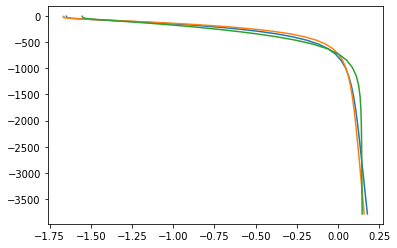

In [30]:
for exp in ds:
    if '5d50' in exp:
        
        sigma = ds[exp].rho - ds[exp].rho_gm
        sigma_bar = properties[exp].horizontal_mean(sigma)
        plt.plot(sigma_bar.mean('t'), properties[exp].coords['Z'])

In [46]:
exp = 'EXP00_5d50'
sigma = ds[exp].rho - ds[exp].rho_gm
sigma_bar = properties[exp].horizontal_mean(sigma)
dsigmadz = grid_ops[exp]._shift_position(grid[exp].derivative(sigma_bar,'Z', boundary='extrapolate', fill_value=0), 'T')

/proj/marine/users/x_bensc/Analysis/myEnv/lib/python3.8/site-packages/xgcm/grid.py:1515: UserWarning: Metric at ('t', 'z_f') being interpolated from metrics at dimensions ('t', 'z_c'). Boundary value set to 'extend'.
  warnings.warn(


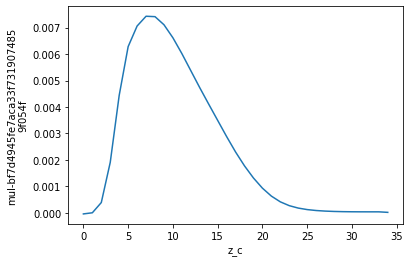

In [47]:
dsigmadz.mean('t').plot()

In [55]:
## Calculate APE based on Equation 19
APE={}
for exp in ds:
    if '5d50' in exp:
        sigma = ds[exp].rho# - ds[exp].rho_gm
        sigma_bar = properties[exp].horizontal_mean(sigma).mean('t')

        APE[exp] =  9.81 / (2) * grid[exp].integrate((sigma-sigma_bar)**2 * 
                            1/(grid_ops[exp]._shift_position(grid[exp].derivative(sigma_bar,'Z', boundary='extrapolate', fill_value=0), 'T')), ['X','Y','Z'])
                                         

/proj/marine/users/x_bensc/Analysis/myEnv/lib/python3.8/site-packages/xgcm/grid.py:1515: UserWarning: Metric at ('z_f',) being interpolated from metrics at dimensions ('t', 'z_c'). Boundary value set to 'extend'.
  warnings.warn(
/proj/marine/users/x_bensc/Analysis/myEnv/lib/python3.8/site-packages/xgcm/grid.py:1515: UserWarning: Metric at ('z_f',) being interpolated from metrics at dimensions ('t', 'z_c'). Boundary value set to 'extend'.
  warnings.warn(
/proj/marine/users/x_bensc/Analysis/myEnv/lib/python3.8/site-packages/xgcm/grid.py:1515: UserWarning: Metric at ('z_f',) being interpolated from metrics at dimensions ('t', 'z_c'). Boundary value set to 'extend'.
  warnings.warn(


In [56]:
for exp in APE:
    print(APE[exp].mean('t').values)

3.1701464062858924e+19
-4.750627535760045e+19
2.2022318208465396e+19


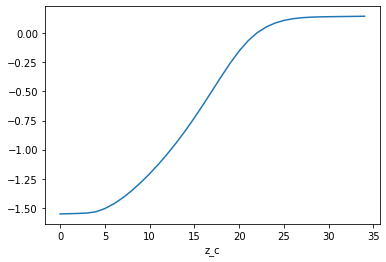

In [54]:
sigma_bar.plot()